In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/cleaned_data.csv')

df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0-12 months
1,1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,25-36 months
2,2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0-12 months
3,3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,37-48 months
4,4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0-12 months


#### **Feature engineering**

In [3]:
service_cols = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in service_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})


In [4]:
df['HasMultipleServices'] = df[service_cols].sum(axis=1) + df['PhoneService']

df.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,HasMultipleServices
0,0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0-12 months,1
1,1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,...,0,0,One year,0,Mailed check,56.95,1889.50,0,25-36 months,3
2,2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0-12 months,3
3,3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37-48 months,3
4,4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0-12 months,1


In [5]:
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlySpend'].fillna(0, inplace=True)

#### **Visualization**

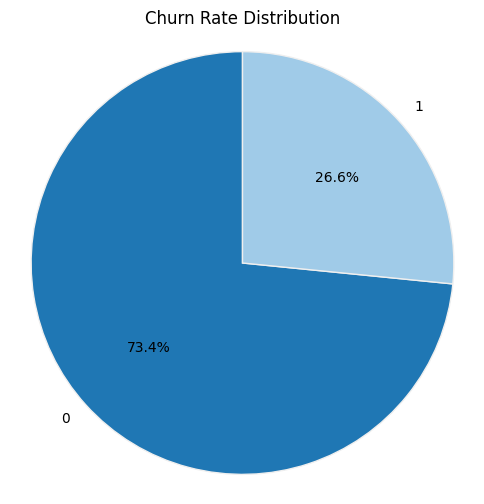

In [6]:
churn_count = df['Churn'].value_counts()

labels = churn_count.index
sizes = churn_count.values

colors = ['#1f77b4', '#a0cbe8']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': '#efefef'})
plt.title('Churn Rate Distribution')
plt.axis('equal')

plt.savefig("../reports/churn_pie.png", dpi = 300, bbox_inches='tight');

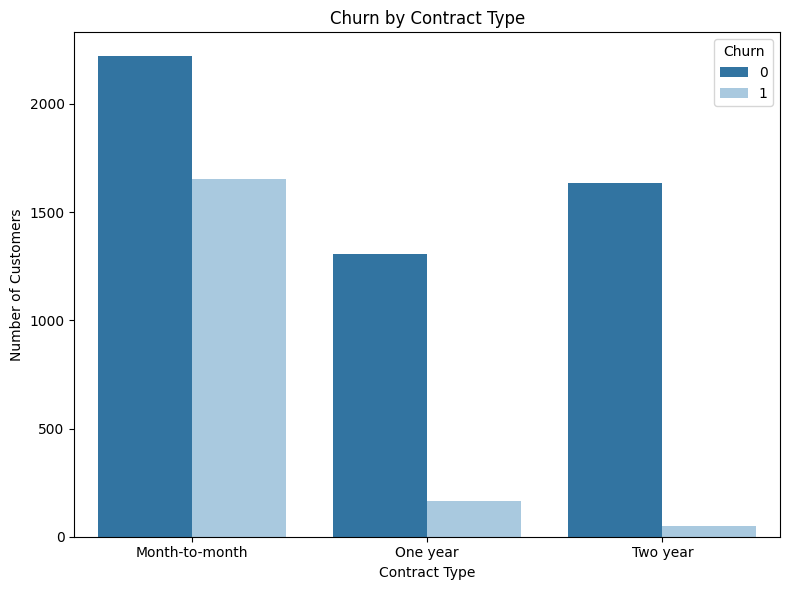

In [7]:
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#a0cbe8']
sns.countplot(data=df, x='Contract', hue='Churn', palette=colors)

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()

plt.savefig("../reports/churn_by_contract.png", dpi=300);
plt.show()

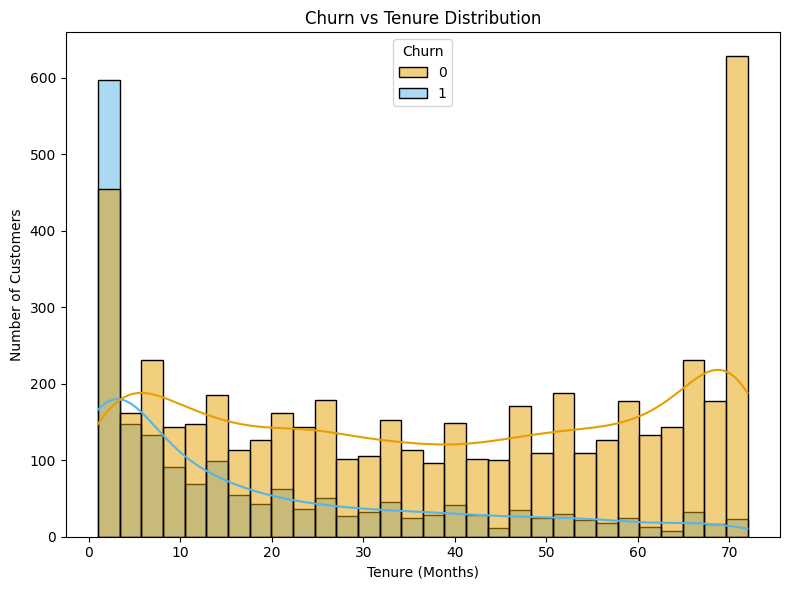

In [8]:
plt.figure(figsize=(8, 6))
colors = ['#E69F00', '#56B4E9']
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, palette=colors)
plt.title("Churn vs Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("../reports/churn_tenure_histogram.png", dpi=300);
plt.show()

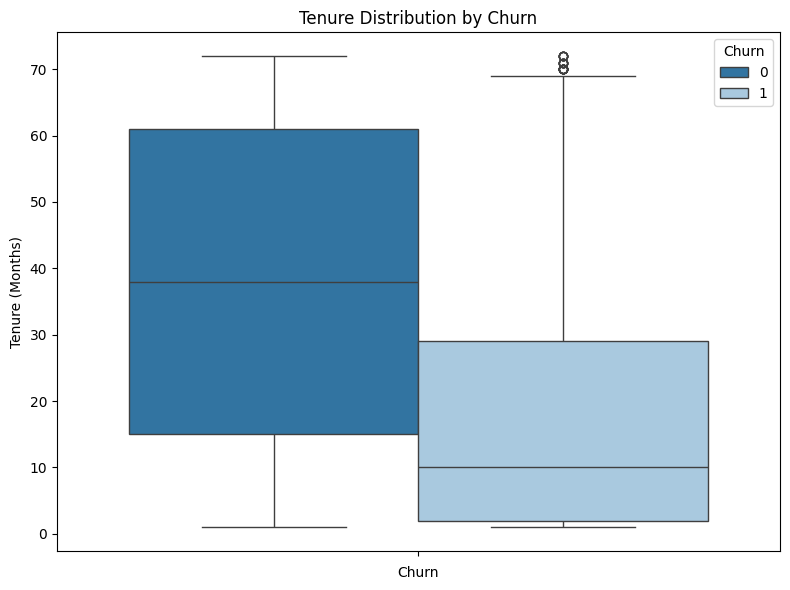

In [9]:
# Boxplot
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#a0cbe8']
sns.boxplot(data=df, hue='Churn', y='tenure', palette=colors)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.tight_layout()
plt.savefig("../reports/churn_tenure_boxplot.png", dpi=300)
plt.show()


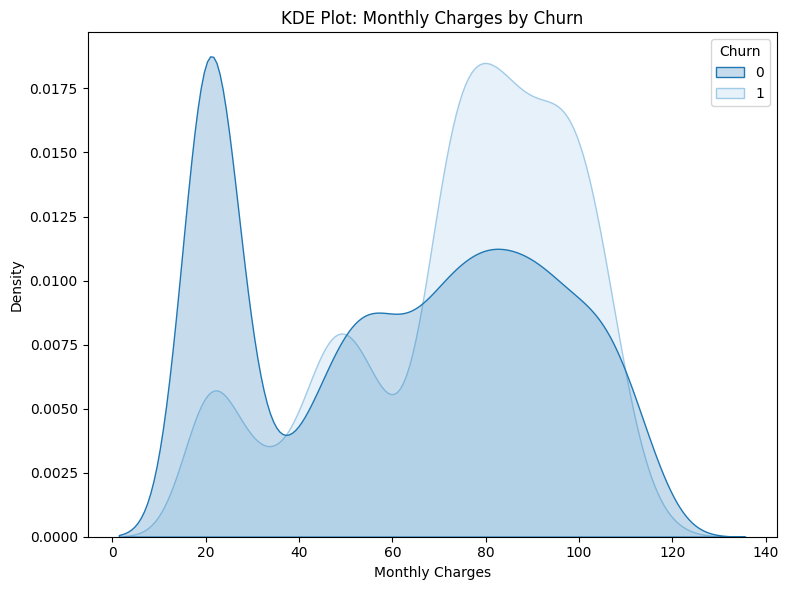

In [10]:
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#a0cbe8']
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette=colors)
plt.title("KDE Plot: Monthly Charges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../reports/churn_monthlycharges.png", dpi=300)
plt.show()